In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
# Load the data
data = pd.read_csv('SMPcap 2021.csv')
data.head(10)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,1/1/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,1/2/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,1/3/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,1/4/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,1/5/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
5,1/6/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
6,1/7/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
7,1/8/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
8,1/9/2021,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,...,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1
9,1/10/2021,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,...,966.8,966.8,966.8,966.8,966.8,966.8,966.7,966.7,966.7,966.7


In [34]:
# Convert the date column to datetime format
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')
data['DayOfYear'] = data['Ngày'].dt.dayofyear
data['Month'] = data['Ngày'].dt.month
data['Year'] = data['Ngày'].dt.year

In [35]:
# Drop the original date column
data = data.drop(columns=['Ngày'])

In [36]:
# Define the target columns
target_columns = ['11', '12']

In [37]:
# Extract features and targets
X = data.drop(columns=target_columns)
y_11 = data['11']
y_12 = data['12']

In [38]:
# Split the data into training and testing sets for each target
X_train, X_test, y_train_11, y_test_11 = train_test_split(X, y_11, test_size=0.2, random_state=42)
X_train, X_test, y_train_12, y_test_12 = train_test_split(X, y_12, test_size=0.2, random_state=42)

# Define the Gaussian Process model
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gp_11 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp_12 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit the model
gp_11.fit(X_train, y_train_11)
gp_12.fit(X_train, y_train_12)

# Make predictions
y_pred_11, sigma_11 = gp_11.predict(X_test, return_std=True)
y_pred_12, sigma_12 = gp_12.predict(X_test, return_std=True)

# Evaluate the model
mse_11 = mean_squared_error(y_test_11, y_pred_11)
r2_11 = r2_score(y_test_11, y_pred_11)
mse_12 = mean_squared_error(y_test_12, y_pred_12)
r2_12 = r2_score(y_test_12, y_pred_12)

print(f"Model for column '11' - MSE: {mse_11}, R2: {r2_11}")
print(f"Model for column '12' - MSE: {mse_12}, R2: {r2_12}")

C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Model for column '11' - MSE: 302044.0036401854, R2: -37.34968607608655
Model for column '12' - MSE: 302043.9981629407, R2: -37.34968538065604


C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


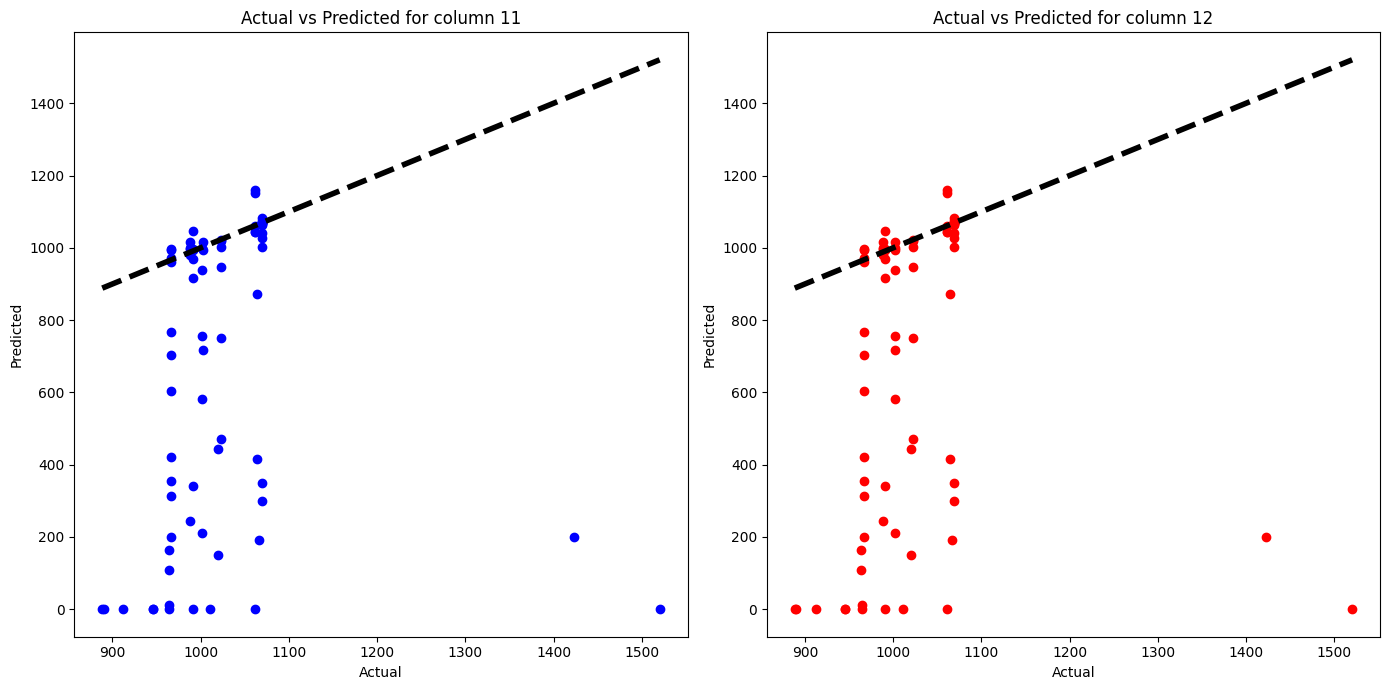

In [39]:
# Plot the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test_11, y_pred_11, color='blue')
plt.plot([y_test_11.min(), y_test_11.max()], [y_test_11.min(), y_test_11.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for column 11')

plt.subplot(1, 2, 2)
plt.scatter(y_test_12, y_pred_12, color='red')
plt.plot([y_test_12.min(), y_test_12.max()], [y_test_12.min(), y_test_12.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for column 12')

plt.tight_layout()
plt.show()

In [60]:
# Perform EDA
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 51 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1          365 non-null    float64
 1   2          365 non-null    float64
 2   3          365 non-null    float64
 3   4          365 non-null    float64
 4   5          365 non-null    float64
 5   6          365 non-null    float64
 6   7          365 non-null    float64
 7   8          365 non-null    float64
 8   9          365 non-null    float64
 9   10         365 non-null    float64
 10  11         365 non-null    float64
 11  12         365 non-null    float64
 12  13         365 non-null    float64
 13  14         365 non-null    float64
 14  15         365 non-null    float64
 15  16         365 non-null    float64
 16  17         365 non-null    float64
 17  18         365 non-null    float64
 18  19         365 non-null    float64
 19  20         365 non-null    float64
 20  21        

,1,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,DayOfYear,Month,Year
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,...,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.0
mean,1040.229041,1040.230685,1040.229041,1040.228219,1040.228767,1040.228767,1040.228493,1040.228219,1040.278082,1040.277808,...,1040.331781,1040.330959,1040.329863,1040.326301,1040.319726,1040.314521,1040.312329,183.000000,6.526027,2021.0
std,105.146791,105.145625,105.146791,105.147113,105.146720,105.146665,105.146912,105.147104,105.152979,105.153179,...,105.139782,105.140047,105.140486,105.142058,105.143752,105.145744,105.147243,105.510663,3.452584,0.0
min,885.700000,885.700000,885.700000,885.700000,885.700000,885.700000,885.700000,885.700000,885.700000,885.700000,...,885.700000,885.700000,885.700000,885.700000,885.700000,885.700000,885.700000,1.000000,1.000000,2021.0
25%,988.400000,988.400000,988.400000,988.400000,988.400000,988.400000,988.400000,988.400000,988.400000,988.400000,...,988.400000,988.400000,988.400000,988.400000,988.400000,988.400000,988.400000,92.000000,4.000000,2021.0
50%,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,...,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,1022.600000,183.000000,7.000000,2021.0
75%,1061.500000,1061.500000,1061.500000,1061.500000,1061.500000,1061.500000,1061.500000,1061.500000,1061.500000,1061.500000,...,1061.600000,1061.600000,1061.600000,1061.600000,1061.600000,1061.500000,1061.500000,274.000000,10.000000,2021.0
max,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,...,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,1565.500000,365.000000,12.000000,2021.0


In [54]:
# Check for missing values
print(data.isnull().sum())

# Convert the date column to datetime format
data['Ngày'] = pd.to_datetime(data['Ngày'], format='%d/%m/%Y')

# Extract features from date
data['DayOfYear'] = data['Ngày'].dt.dayofyear
data['Month'] = data['Ngày'].dt.month
data['Year'] = data['Ngày'].dt.year

# Drop the original date column
data = data.drop(columns=['Ngày'])

Ngày    0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
dtype: int64


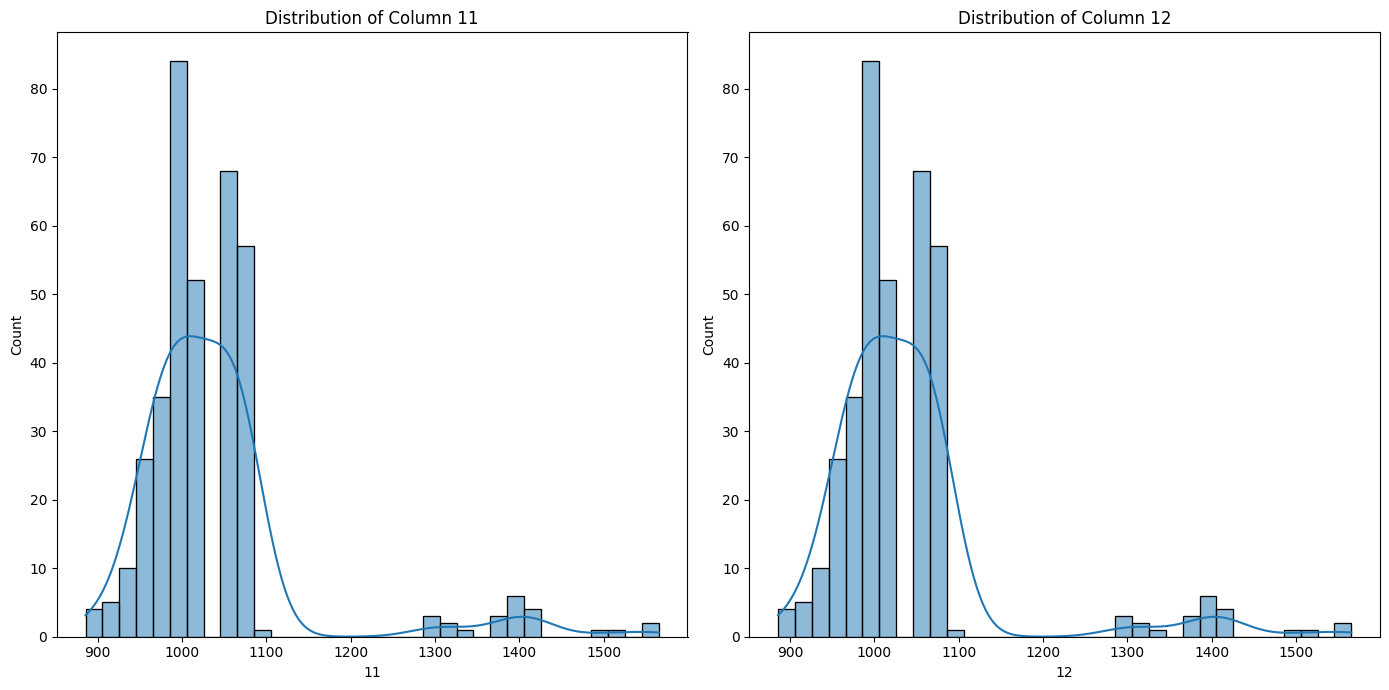

In [55]:
# Visualize the distribution of target variables
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(data['11'], kde=True)
plt.title('Distribution of Column 11')

plt.subplot(1, 2, 2)
sns.histplot(data['12'], kde=True)
plt.title('Distribution of Column 12')

plt.tight_layout()
plt.show()

In [57]:
# Define the target columns
target_columns = ['11', '12']

# Extract features and targets
X = data.drop(columns=target_columns)
y_11 = data['11']
y_12 = data['12']

# Split the data into training and testing sets for each target
X_train, X_test, y_train_11, y_test_11 = train_test_split(X, y_11, test_size=0.2, random_state=42)
X_train, X_test, y_train_12, y_test_12 = train_test_split(X, y_12, test_size=0.2, random_state=42)

# Define the Gaussian Process model
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gp_11 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gp_12 = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)

# Fit the model
gp_11.fit(X_train, y_train_11)
gp_12.fit(X_train, y_train_12)

# Make predictions
y_pred_11, sigma_11 = gp_11.predict(X_test, return_std=True)
y_pred_12, sigma_12 = gp_12.predict(X_test, return_std=True)

# Evaluate the model
mse_11 = mean_squared_error(y_test_11, y_pred_11)
r2_11 = r2_score(y_test_11, y_pred_11)
mse_12 = mean_squared_error(y_test_12, y_pred_12)
r2_12 = r2_score(y_test_12, y_pred_12)

print(f"Model for column '11' - MSE: {mse_11}, R2: {r2_11}")
print(f"Model for column '12' - MSE: {mse_12}, R2: {r2_12}")

C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Model for column '11' - MSE: 302044.0036401854, R2: -37.34968607608655
Model for column '12' - MSE: 302043.9981629407, R2: -37.34968538065604


C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Users\kiet6\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\gaussian_process\kernels.py:429: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


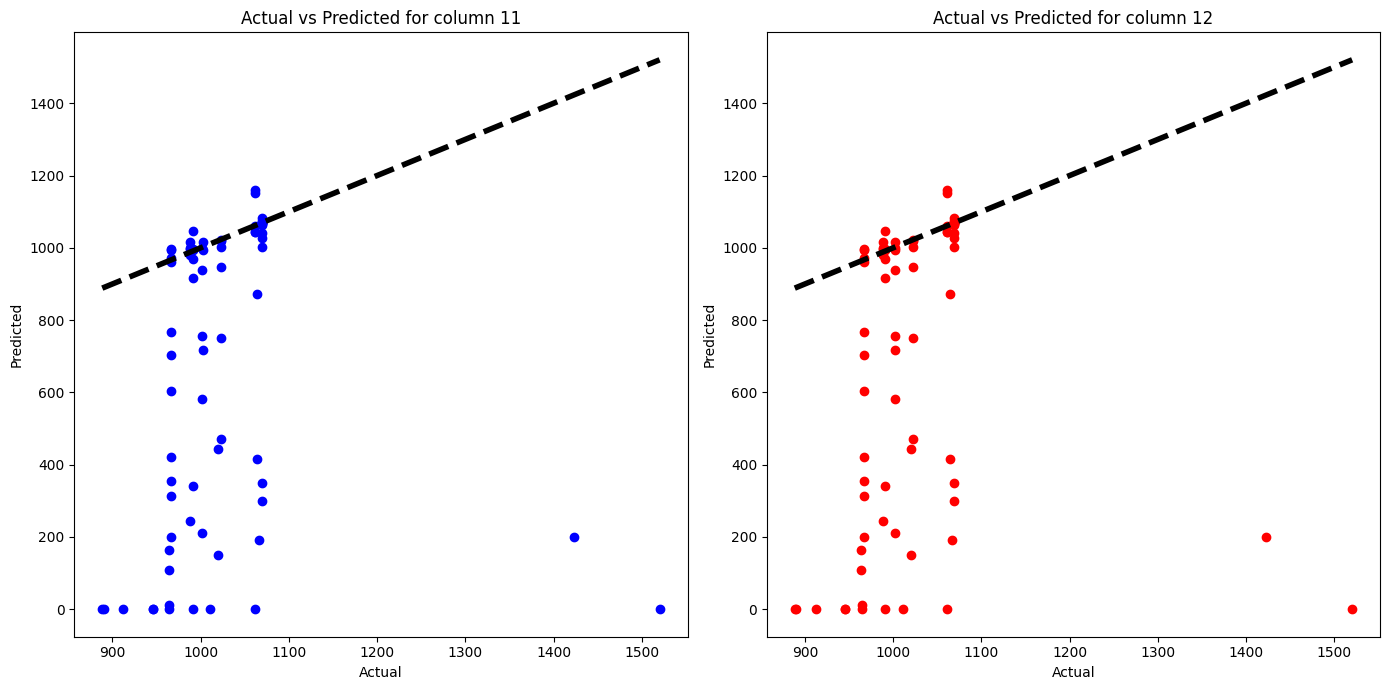

In [30]:
# Plot the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test_11, y_pred_11, color='blue')
plt.plot([y_test_11.min(), y_test_11.max()], [y_test_11.min(), y_test_11.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for column 11')

plt.subplot(1, 2, 2)
plt.scatter(y_test_12, y_pred_12, color='red')
plt.plot([y_test_12.min(), y_test_12.max()], [y_test_12.min(), y_test_12.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for column 12')

plt.tight_layout()
plt.show()

Random Forest Model for column '11' - MSE: 2.22939554794549, R2: 0.9997169398552107
Random Forest Model for column '12' - MSE: 2.015864602740012, R2: 0.9997440512847291


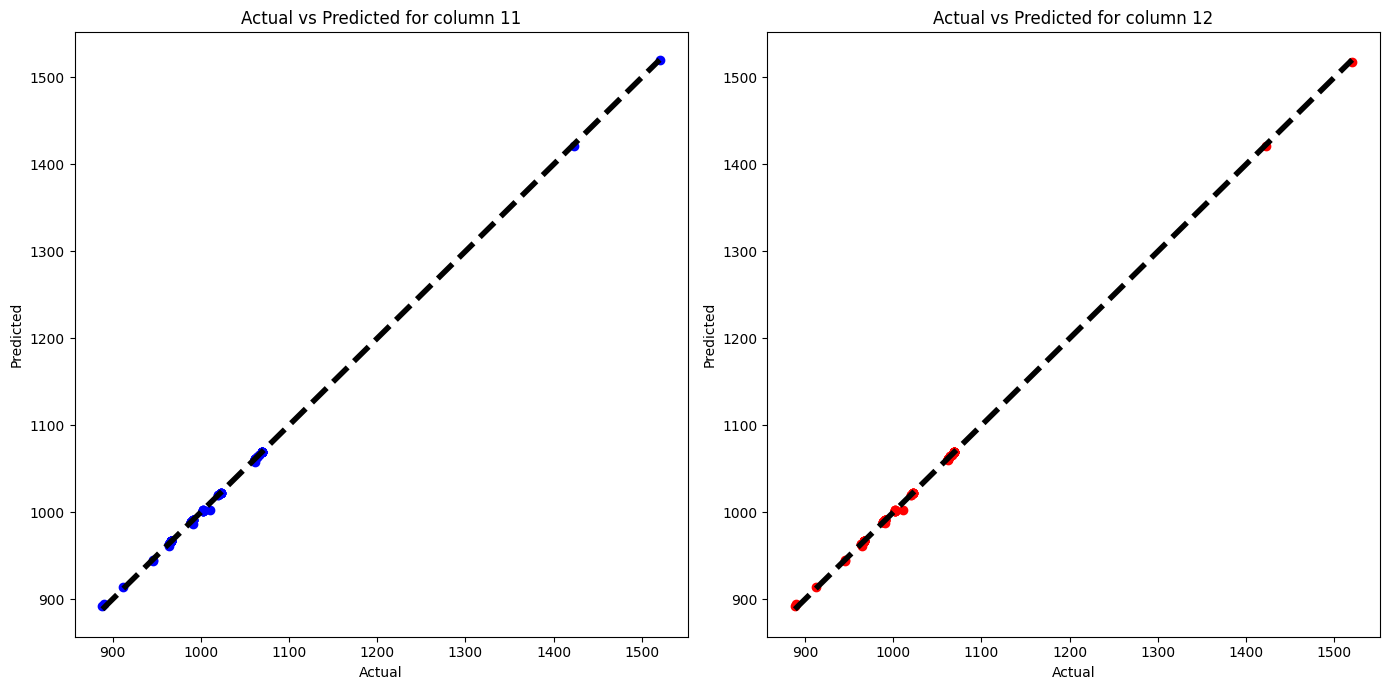

In [59]:
from sklearn.ensemble import RandomForestRegressor
# Split the data into training and testing sets for each target
X_train, X_test, y_train_11, y_test_11 = train_test_split(X, y_11, test_size=0.2, random_state=42)
X_train, X_test, y_train_12, y_test_12 = train_test_split(X, y_12, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_11 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_12 = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_11.fit(X_train, y_train_11)
rf_12.fit(X_train, y_train_12)

# Make predictions
y_pred_11 = rf_11.predict(X_test)
y_pred_12 = rf_12.predict(X_test)

# Evaluate the model
mse_11 = mean_squared_error(y_test_11, y_pred_11)
r2_11 = r2_score(y_test_11, y_pred_11)
mse_12 = mean_squared_error(y_test_12, y_pred_12)
r2_12 = r2_score(y_test_12, y_pred_12)

print(f"Random Forest Model for column '11' - MSE: {mse_11}, R2: {r2_11}")
print(f"Random Forest Model for column '12' - MSE: {mse_12}, R2: {r2_12}")

# Plot the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test_11, y_pred_11, color='blue')
plt.plot([y_test_11.min(), y_test_11.max()], [y_test_11.min(), y_test_11.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for column 11')

plt.subplot(1, 2, 2)
plt.scatter(y_test_12, y_pred_12, color='red')
plt.plot([y_test_12.min(), y_test_12.max()], [y_test_12.min(), y_test_12.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted for column 12')

plt.tight_layout()
plt.show()